In [1]:
from requests import get
from bs4 import BeautifulSoup
import pandas as pd
import requests
import matplotlib.pyplot as plt

In [2]:
url = "https://www.worldometers.info/coronavirus/worldwide-graphs/#daily-deaths"
req = requests.get(url)
soup = BeautifulSoup(req.text, "html.parser")

In [3]:
Date=[]
Total_deaths=[]

In [4]:
element = soup.findAll("tbody")
element

[<tbody>
 <tr>
 <td align="left">
 <div align="left">Jan. 21 </div>
 </td>
 <td align="right"><strong>2,098,883</strong></td>
 <td align="right">16,744</td>
 <td align="right">1%</td>
 </tr>
 <tr>
 <td align="left">
 <div align="left">Jan. 20 </div>
 </td>
 <td align="right"><strong>2,082,139</strong></td>
 <td align="right">17,488</td>
 <td align="right">1%</td>
 </tr>
 <tr>
 <td align="left">
 <div align="left">Jan. 19 </div>
 </td>
 <td align="right"><strong>2,064,651</strong></td>
 <td align="right">14,794</td>
 <td align="right">1%</td>
 </tr>
 <tr>
 <td align="left">
 <div align="left">Jan. 18 </div>
 </td>
 <td align="right"><strong>2,049,857</strong></td>
 <td align="right">9,433</td>
 <td align="right">0%</td>
 </tr>
 <tr>
 <td align="left">
 <div align="left">Jan. 17 </div>
 </td>
 <td align="right"><strong>2,040,424</strong></td>
 <td align="right">9,494</td>
 <td align="right">0%</td>
 </tr>
 <tr>
 <td align="left">
 <div align="left">Jan. 16 </div>
 </td>
 <td align="right

In [5]:
Date=[]
Total_deaths=[]
Total_change=[]
Percentage_change=[]

for el in element:
    for tr_tag in el.findAll('tr'):
        for td_tag in tr_tag.findAll('div'):
            l= tr_tag.get_text().split('\n')[1:9]
            Date.append(l[1])
            Total_deaths.append(l[3])
            Total_change.append(l[4])
            Percentage_change.append(l[5])
    
    



In [6]:
# Percentage_change
death_count_table = {
    "Date": Date,
    "Total Deaths": Total_deaths,
    "Total Change": Total_change,
    "Percentage Change": Percentage_change,
}
df = pd.DataFrame.from_dict(death_count_table, orient='index').transpose()
df

,Date,Total Deaths,Total Change,Percentage Change
0,Jan. 21,"2,098,883","16,744",1%
1,Jan. 20,"2,082,139","17,488",1%
2,Jan. 19,"2,064,651","14,794",1%
3,Jan. 18,"2,049,857","9,433",0%
4,Jan. 17,"2,040,424","9,494",0%
...,...,...,...,...
725,Jan. 27,26,2,8%
726,Jan. 26,24,9,60%
727,Jan. 25,15,-4,-21%
728,Jan. 24,19,"-13,869",-100%


In [7]:
df.dtypes

Date                 object
Total Deaths         object
Total Change         object
Percentage Change    object
dtype: object

In [8]:
# for column in df: 
#     if column=='Date':
#         pass
#     else:
#         df[column] = pd.to_numeric(df[column], errors='coerce')

In [9]:
df = df.replace(',','', regex=True)
for column in df: 
    if column=='Date' or column=='Percentage Change':
        pass
    else:
        df[column] = pd.to_numeric(df[column], errors='coerce')


In [10]:
df.dtypes

Date                 object
Total Deaths          int64
Total Change          int64
Percentage Change    object
dtype: object

In [11]:
df.drop(df.tail(9).index,inplace=True) 
pd.set_option('display.max_rows', None)
df

,Date,Total Deaths,Total Change,Percentage Change
0,Jan. 21,2098883,16744,1%
1,Jan. 20,2082139,17488,1%
2,Jan. 19,2064651,14794,1%
3,Jan. 18,2049857,9433,0%
4,Jan. 17,2040424,9494,0%
5,Jan. 16,2030930,13493,1%
6,Jan. 15,2017437,14942,1%
7,Jan. 14,2002495,15697,1%
8,Jan. 13,1986798,16579,1%
9,Jan. 12,1970219,16076,1%


In [12]:
df_death_count = df.filter(['Date','Total Change'], axis=1)

In [13]:
df_death_count.drop(df_death_count.tail(357).index,inplace=True) 

In [14]:
# df_death_count.groupby(['Date']).sum()
d= {'Date':'first','Total Change':'sum'}
grouper = df_death_count['Date'].str.split().str[0]
out = df_death_count.drop_duplicates().groupby(grouper).agg(d).reset_index(drop=True)
print(out)

        Date  Total Change
0   Apr. 30         193757
1   Aug. 31         176907
2   Dec. 31         352043
3   Feb. 29           2713
4   Jan. 21         272202
5   Jul. 31         167721
6   Jun. 30         140169
7   Mar. 31          42258
8   May. 31         147195
9   Nov. 30         272187
10  Oct. 31         176324
11  Sep. 30         155382


In [15]:
out

,Date,Total Change
0,Apr. 30,193757
1,Aug. 31,176907
2,Dec. 31,352043
3,Feb. 29,2713
4,Jan. 21,272202
5,Jul. 31,167721
6,Jun. 30,140169
7,Mar. 31,42258
8,May. 31,147195
9,Nov. 30,272187


<Figure size 432x216 with 0 Axes>

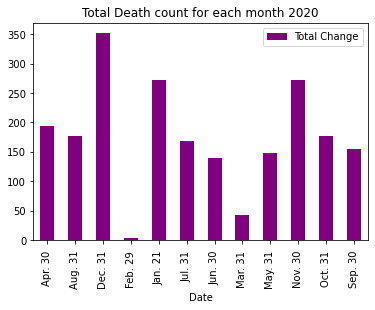

In [16]:
out['Total Change']=out['Total Change']/1000
fig= plt.figure(figsize=(6,3))
ax = out.plot.bar(x='Date', y='Total Change', rot=0,color="purple")
plt.xticks(rotation='vertical')
plt.title('Total Death count for each month 2020')
plt.show()

#maximum no of death occured in the month december 2020

In [17]:
df

,Date,Total Deaths,Total Change,Percentage Change
0,Jan. 21,2098883,16744,1%
1,Jan. 20,2082139,17488,1%
2,Jan. 19,2064651,14794,1%
3,Jan. 18,2049857,9433,0%
4,Jan. 17,2040424,9494,0%
5,Jan. 16,2030930,13493,1%
6,Jan. 15,2017437,14942,1%
7,Jan. 14,2002495,15697,1%
8,Jan. 13,1986798,16579,1%
9,Jan. 12,1970219,16076,1%


In [18]:
# df_death_count['Total Change']=df_death_count['Total Change']/1000
# # df_death_count.set_index('Date',inplace=True)
# df_death_count.plot.line()

In [19]:
# # df_death_count['Total Change']=df_death_count['Total Change']/1000
# df_death_count

# Line plot for total deaths over year 2020

In [20]:
df_death_trend = df.filter(['Date','Total Deaths'], axis=1)
df_death_trend.drop(df_death_trend.tail(357).index,inplace=True) 

In [21]:
df_death_trend['Total Deaths']=df_death_trend['Total Deaths']/1000000

In [22]:
df_death_trend.set_index('Date')

,Total Deaths
Date,
Jan. 21,2.098883
Jan. 20,2.082139
Jan. 19,2.064651
Jan. 18,2.049857
Jan. 17,2.040424
Jan. 16,2.030930
Jan. 15,2.017437
Jan. 14,2.002495
Jan. 13,1.986798


In [23]:
def reset_my_index(df):
    res = df[::-1].reset_index(drop=True)
    return(res)

new_df=reset_my_index(df_death_trend)

In [24]:
# new_df

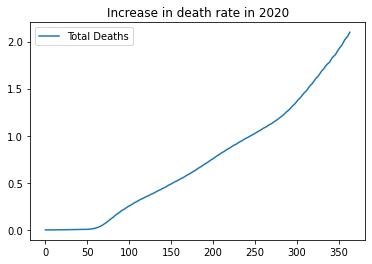

In [25]:
new_df.plot.line()
plt.title('Increase in death rate in 2020')
plt.show()